In [1]:
import pandas as pd
import requests
from io import StringIO

%matplotlib inline

import numpy as np
#import modin.pandas as pd
import matplotlib.pyplot as plt

#import cufflinks as cf
#cf.go_offline()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import numpy as np
import seaborn as sns; sns.set()

#from pathos.multiprocessing import ProcessingPool as Pool
import pandas.util.testing as tm
import multiprocessing as mp

/Users/daniel.clark/.pyenv/versions/3.7.5/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/daniel.clark/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [13]:
femaledrive = 'https://drive.google.com/file/d/1tWrKX1Q-iRcmrWUMbOYd4IUBoPPmFs_U/view?usp=sharing'

file_id = femaledrive.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
femaleclean = pd.read_csv(csv_raw)
femaleclean.head()
femaleclean = femaleclean.iloc[0:190047]

In [14]:
femaleclean = femaleclean[(femaleclean.OBSERVED == 1)]
femaleclean = femaleclean[(femaleclean.Sex == 0)]

In [15]:
femaleclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2089
Data columns (total 70 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2090 non-null   int64  
 1   FID         2090 non-null   int64  
 2   Id          2090 non-null   int64  
 3   Sex         2090 non-null   int64  
 4   Bear_ID     2090 non-null   int64  
 5   SAMPLEID    2090 non-null   int64  
 6   TURNANGLE   2090 non-null   float64
 7   STEPLENGTH  2090 non-null   float64
 8   BEARING     2090 non-null   float64
 9   OBSERVED    2090 non-null   int64  
 10  datetime    2090 non-null   float64
 11  month       2090 non-null   int64  
 12  CLUSTER     2090 non-null   int64  
 13  disagLWM    2090 non-null   float64
 14  disagMIN    2090 non-null   float64
 15  disagMAX    2090 non-null   float64
 16  disagBEG    2090 non-null   float64
 17  disagEND    2090 non-null   float64
 18  disforLWM   2090 non-null   float64
 19  disforMIN   2090 non-null  

In [16]:
femaleclean['time_difference'] = femaleclean['datetime'] - femaleclean['datetime'].shift(1)

femaleclean.head()

,Unnamed: 0,FID,Id,Sex,Bear_ID,SAMPLEID,TURNANGLE,STEPLENGTH,BEARING,OBSERVED,...,naturalBEG,naturalEND,NatnegLWM,NatnegMIN,NatnegMAX,NatnegBEG,NatnegEND,STRATUM,resid,time_difference
0,1,0,0,0,7,0,122.738490,329.371060,332.177023,1,...,1,1,-256.918925,-400.249908,-108.166542,-400.249908,-108.166542,1,1.619778,NaN
1,12,11,0,0,7,11,-163.857763,596.801120,168.319259,1,...,1,1,-333.297213,-496.588348,-108.166542,-108.166542,-416.773315,2,1.887523,0.29166
2,23,22,0,0,7,22,-150.260818,554.762369,18.058442,1,...,1,1,-419.938047,-550.726807,-258.069763,-416.773315,-258.069763,3,1.712916,0.16667
3,34,33,0,0,7,33,96.365383,617.323955,114.423824,1,...,1,1,-306.522643,-417.851654,-169.705627,-258.069763,-169.705627,4,1.732025,0.41597
4,45,44,0,0,7,44,50.005390,363.594567,164.429215,1,...,1,1,-151.907745,-234.307495,-60.000000,-169.705627,-60.000000,5,1.726947,0.54167


In [17]:
femaleclean['time_difference'] = femaleclean['time_difference'].fillna(0)


In [18]:
femaleclean.head()

,Unnamed: 0,FID,Id,Sex,Bear_ID,SAMPLEID,TURNANGLE,STEPLENGTH,BEARING,OBSERVED,...,naturalBEG,naturalEND,NatnegLWM,NatnegMIN,NatnegMAX,NatnegBEG,NatnegEND,STRATUM,resid,time_difference
0,1,0,0,0,7,0,122.738490,329.371060,332.177023,1,...,1,1,-256.918925,-400.249908,-108.166542,-400.249908,-108.166542,1,1.619778,0.00000
1,12,11,0,0,7,11,-163.857763,596.801120,168.319259,1,...,1,1,-333.297213,-496.588348,-108.166542,-108.166542,-416.773315,2,1.887523,0.29166
2,23,22,0,0,7,22,-150.260818,554.762369,18.058442,1,...,1,1,-419.938047,-550.726807,-258.069763,-416.773315,-258.069763,3,1.712916,0.16667
3,34,33,0,0,7,33,96.365383,617.323955,114.423824,1,...,1,1,-306.522643,-417.851654,-169.705627,-258.069763,-169.705627,4,1.732025,0.41597
4,45,44,0,0,7,44,50.005390,363.594567,164.429215,1,...,1,1,-151.907745,-234.307495,-60.000000,-169.705627,-60.000000,5,1.726947,0.54167


In [19]:
femaleclean['stepsbytime'] = femaleclean['STEPLENGTH'] / femaleclean['time_difference']

In [20]:
#maleclean['stepsbytime'].mean()
femaleclean['stepsbytime'].median()

2222.173295977749

In [22]:
femaleclean['Wandering'] = (femaleclean.stepsbytime<2222) & (np.abs(femaleclean.TURNANGLE) > 45)

In [23]:
femaleclean.head()

,Unnamed: 0,FID,Id,Sex,Bear_ID,SAMPLEID,TURNANGLE,STEPLENGTH,BEARING,OBSERVED,...,NatnegLWM,NatnegMIN,NatnegMAX,NatnegBEG,NatnegEND,STRATUM,resid,time_difference,stepsbytime,Wandering
0,1,0,0,0,7,0,122.738490,329.371060,332.177023,1,...,-256.918925,-400.249908,-108.166542,-400.249908,-108.166542,1,1.619778,0.00000,inf,False
1,12,11,0,0,7,11,-163.857763,596.801120,168.319259,1,...,-333.297213,-496.588348,-108.166542,-108.166542,-416.773315,2,1.887523,0.29166,2046.222040,True
2,23,22,0,0,7,22,-150.260818,554.762369,18.058442,1,...,-419.938047,-550.726807,-258.069763,-416.773315,-258.069763,3,1.712916,0.16667,3328.507642,False
3,34,33,0,0,7,33,96.365383,617.323955,114.423824,1,...,-306.522643,-417.851654,-169.705627,-258.069763,-169.705627,4,1.732025,0.41597,1484.058839,True
4,45,44,0,0,7,44,50.005390,363.594567,164.429215,1,...,-151.907745,-234.307495,-60.000000,-169.705627,-60.000000,5,1.726947,0.54167,671.247377,True


In [24]:
femaleclean.Wandering.sum()

750

In [25]:
plt.rcParams['figure.max_open_warning']=40
plt.rcParams['figure.figsize']=(10,10)
colnames=list(femaleclean.drop(['Wandering'], axis=1).select_dtypes(exclude='O').columns.values)
#for i in colnames[0:]:
#    facet = sns.FacetGrid(maleclean, hue='month',aspect=2)
#    facet.map(sns.distplot,i)
#    facet.add_legend()
#    facet.fig.suptitle(''.join(map(str, list([colnames.index(i)+1,": ",i," Distribution By Label"]))))
#    plt.tight_layout()
#    plt.show()

In [26]:
femaleclean.datetime

0       40344.56042
1       40344.85208
2       40345.01875
3       40345.43472
4       40345.97639
           ...     
2085    41149.83403
2086    41149.91667
2087    41150.50000
2088    41150.75000
2089    41151.00000
Name: datetime, Length: 2090, dtype: float64

In [27]:
femaleclean.Wandering = femaleclean.Wandering.astype(int)


In [28]:
femaleclean = femaleclean.drop(['TURNANGLE', 'STEPLENGTH', 'stepsbytime'], axis=1)
femaleclean.head()

,Unnamed: 0,FID,Id,Sex,Bear_ID,SAMPLEID,BEARING,OBSERVED,datetime,month,...,naturalEND,NatnegLWM,NatnegMIN,NatnegMAX,NatnegBEG,NatnegEND,STRATUM,resid,time_difference,Wandering
0,1,0,0,0,7,0,332.177023,1,40344.56042,6,...,1,-256.918925,-400.249908,-108.166542,-400.249908,-108.166542,1,1.619778,0.00000,0
1,12,11,0,0,7,11,168.319259,1,40344.85208,6,...,1,-333.297213,-496.588348,-108.166542,-108.166542,-416.773315,2,1.887523,0.29166,1
2,23,22,0,0,7,22,18.058442,1,40345.01875,6,...,1,-419.938047,-550.726807,-258.069763,-416.773315,-258.069763,3,1.712916,0.16667,0
3,34,33,0,0,7,33,114.423824,1,40345.43472,6,...,1,-306.522643,-417.851654,-169.705627,-258.069763,-169.705627,4,1.732025,0.41597,1
4,45,44,0,0,7,44,164.429215,1,40345.97639,6,...,1,-151.907745,-234.307495,-60.000000,-169.705627,-60.000000,5,1.726947,0.54167,1


In [29]:
#create a holdout set
from sklearn.model_selection import train_test_split
df_x, unseen_x_test, df_y, unseen_y_test = train_test_split(femaleclean.loc[:, femaleclean.columns != 'Wandering'], femaleclean['Wandering'], test_size=0.30, stratify=femaleclean['Wandering'],random_state=53)

In [30]:
print(unseen_x_test.shape)
print(unseen_y_test.shape)

df_x.reset_index(drop=True, inplace=True)
unseen_x_test.reset_index(drop=True, inplace=True)
df_y.reset_index(drop=True, inplace=True)
unseen_y_test.reset_index(drop=True, inplace=True)

(627, 69)
(627,)


In [31]:
print(df_x.shape)
print(df_y.shape)

(1463, 69)
(1463,)


In [32]:
##TRAIN
#scale the test data seperately from the unseen holdout set
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

x = df_x.loc[:, df_x.dtypes == 'float64'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x = imp.fit_transform(x)
x = pd.DataFrame(x)
x.columns = df_x.loc[:, df_x.dtypes == 'float64'].columns
unscaled = pd.concat([pd.DataFrame(x),df_y], axis=1)

##HOLDOUT
#scale the test data seperately from the unseen holdout set
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

x = unseen_x_test.loc[:, unseen_x_test.dtypes == 'float64'].values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
x = imp.fit_transform(x)
x = pd.DataFrame(x)
x.columns = unseen_x_test.loc[:, unseen_x_test.dtypes == 'float64'].columns
x = pd.DataFrame(x)
#one_hot = pd.get_dummies(unseen_x_test.x24)
unseen_x = pd.concat([x], axis=1)

In [33]:
unscaled.head()

,BEARING,datetime,disagLWM,disagMIN,disagMAX,disagBEG,disagEND,disforLWM,disforMIN,disforMAX,...,forestLWM,naturalLWM,NatnegLWM,NatnegMIN,NatnegMAX,NatnegBEG,NatnegEND,resid,time_difference,Wandering
0,25.114765,40444.37986,458.719445,271.66156,632.850708,271.66156,632.850708,0.651826,0.0,30.0,...,0.978272,0.978272,-211.654907,-362.491394,30.0,-271.66156,30.000000,1.853943,0.37500,0
1,116.650430,41148.83333,30.003699,0.00000,67.082039,0.00000,60.000000,4.066369,0.0,30.0,...,0.864454,0.864454,-25.937330,-67.082039,30.0,30.00000,-60.000000,1.218977,0.16597,0
2,271.938624,40829.00069,56.565328,30.00000,60.000000,30.00000,60.000000,0.000000,0.0,0.0,...,1.000000,1.000000,-56.565328,-60.000000,-30.0,-30.00000,-60.000000,1.494844,0.74930,1
3,102.141768,40832.16667,17.045493,0.00000,123.693169,0.00000,123.693169,56.869666,0.0,120.0,...,0.239004,0.239004,47.123746,-60.000000,120.0,30.00000,-42.426407,1.417934,0.91667,1
4,140.183810,40433.83403,37.012882,0.00000,150.000000,30.00000,150.000000,20.752826,0.0,60.0,...,0.415858,0.415858,-16.260056,-150.000000,60.0,-30.00000,-150.000000,1.615502,0.24861,1


In [34]:
unscaled.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 52 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BEARING          1463 non-null   float64
 1   datetime         1463 non-null   float64
 2   disagLWM         1463 non-null   float64
 3   disagMIN         1463 non-null   float64
 4   disagMAX         1463 non-null   float64
 5   disagBEG         1463 non-null   float64
 6   disagEND         1463 non-null   float64
 7   disforLWM        1463 non-null   float64
 8   disforMIN        1463 non-null   float64
 9   disforMAX        1463 non-null   float64
 10  disforBEG        1463 non-null   float64
 11  disforEND        1463 non-null   float64
 12  disnatLWM        1463 non-null   float64
 13  disnatMIN        1463 non-null   float64
 14  disnatMAX        1463 non-null   float64
 15  disnatBEG        1463 non-null   float64
 16  disnatEND        1463 non-null   float64
 17  distrdsLWM    

In [35]:
#pip install pycaret
from lightgbm import LGBMClassifier as lgbmc

In [36]:
from pycaret.classification import *
#intialize the setup

exp_clf = setup(unscaled
                ,target = 'Wandering'
                ,train_size = 0.7
                ,profile = False
                ,remove_multicollinearity = True
                ,polynomial_features = False
                ,feature_interaction = True
                ,feature_ratio = False
                ,feature_selection = True
                ,fix_imbalance = False
                ,silent=True
                #,cluster = True
                ,pca = False
                ,numeric_imputation = 'mean'
                ,normalize=True
                ,n_jobs=42
               )

,Description,Value
0,session_id,6054
1,Target,Wandering
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1463, 52)"
5,Missing Values,False
6,Numeric Features,51
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [37]:
# compare all baseline models and select top 5
top5 = compare_models(n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7647,0.8465,0.7359,0.7622,0.7625,0.4787,0.4801,5.7930
gbc,Gradient Boosting Classifier,0.7618,0.8351,0.7283,0.7580,0.7581,0.4673,0.4698,0.4220
rf,Random Forest Classifier,0.7588,0.8371,0.7259,0.7558,0.7551,0.4614,0.4644,0.2250
et,Extra Trees Classifier,0.7511,0.8221,0.7045,0.7445,0.7425,0.4287,0.4357,0.6760
xgboost,Extreme Gradient Boosting,0.7481,0.8209,0.7144,0.7439,0.7448,0.4384,0.4400,0.7140
ada,Ada Boost Classifier,0.7471,0.8131,0.7100,0.7424,0.7426,0.4325,0.4355,0.3080
lightgbm,Light Gradient Boosting Machine,0.7384,0.8254,0.7040,0.7344,0.7347,0.4167,0.4188,1.8220
qda,Quadratic Discriminant Analysis,0.7129,0.7930,0.6535,0.7201,0.6897,0.3235,0.3533,0.3200
dt,Decision Tree Classifier,0.7070,0.6801,0.6801,0.7087,0.7065,0.3616,0.3632,0.3530
lda,Linear Discriminant Analysis,0.7041,0.7435,0.6454,0.6944,0.6896,0.3108,0.3220,0.1150


In [38]:
catboost = create_model(estimator = 'catboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7379,0.8350,0.7064,0.7339,0.7352,0.4203,0.4211
1,0.7961,0.8591,0.7697,0.7935,0.7941,0.5491,0.5502
2,0.7767,0.8636,0.7426,0.7726,0.7727,0.5001,0.5031
3,0.7087,0.7887,0.6777,0.7055,0.7069,0.3597,0.3600
4,0.7549,0.8565,0.7096,0.7486,0.7479,0.4386,0.4441
5,0.7549,0.8316,0.7285,0.7534,0.7541,0.4600,0.4601
6,0.7647,0.8359,0.7424,0.7647,0.7647,0.4848,0.4848
7,0.7549,0.8556,0.7159,0.7494,0.7502,0.4459,0.4487
8,0.7843,0.8380,0.7702,0.7874,0.7856,0.5337,0.5341
9,0.8137,0.9015,0.7956,0.8128,0.8132,0.5947,0.5949


In [40]:
# select best model 
best = automl(optimize = 'MCC')

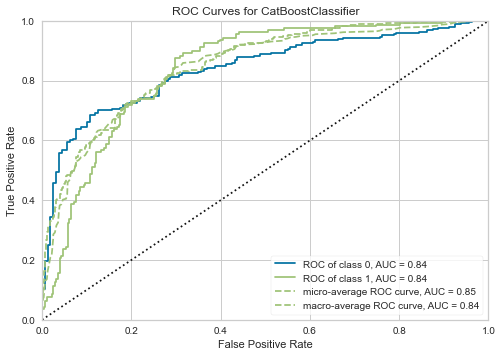

In [41]:
plot_model(best)


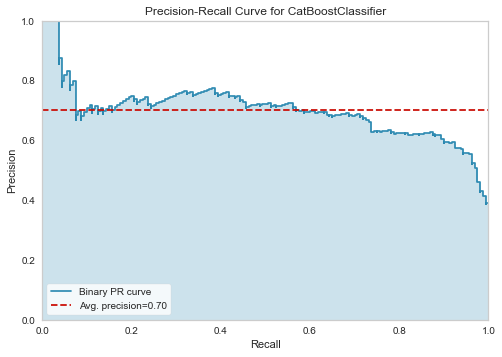

In [42]:
plot_model(best, plot='pr')


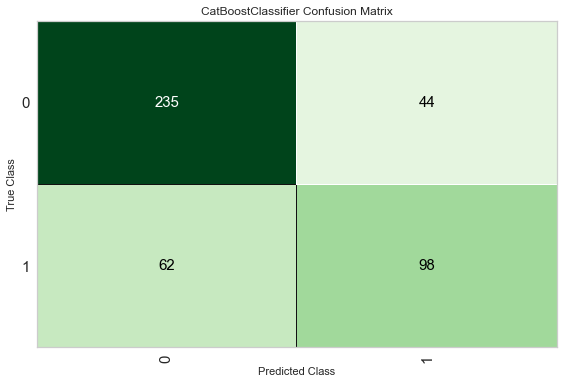

In [43]:
plot_model(best, plot='confusion_matrix')

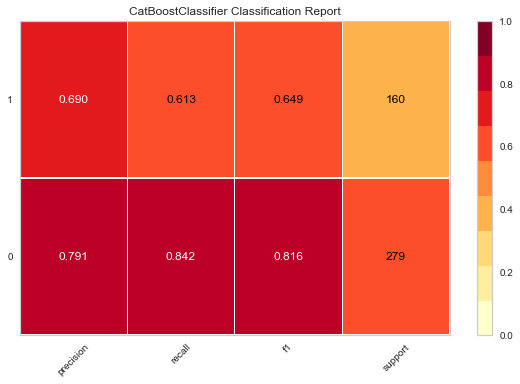

In [44]:
plot_model(best, plot='class_report')


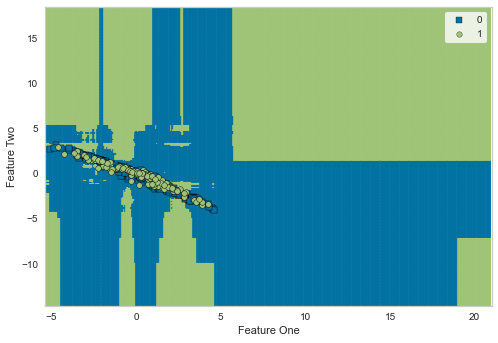

In [45]:
plot_model(best, plot='boundary')


In [46]:
plot_model(best, plot='parameter')


,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


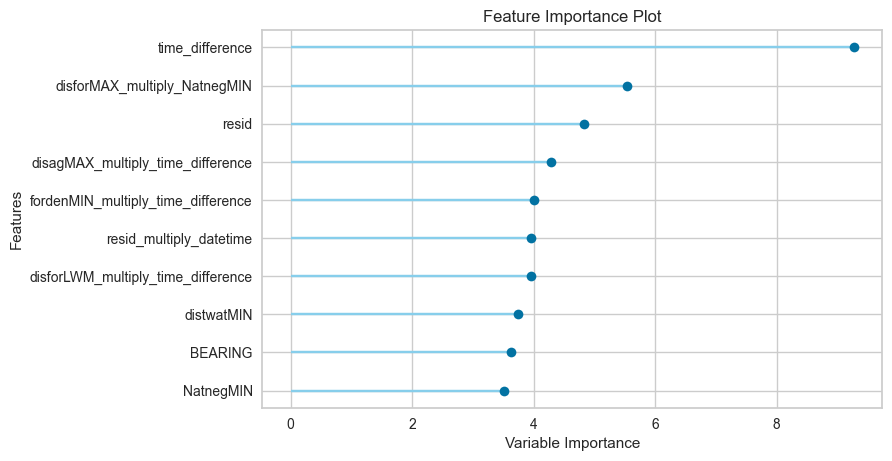

In [47]:
plot_model(best, plot='feature')